# Analyse the happiness data
* There is no universally accepted definition of happiness, but there have been some ideas about how it could be measured. Starting in 2012, the World Happiness Report is a nearly annual1 publication by the Sustainable Development Solutions Network to make national metrics available to the public.
* So we need to get all data in this file and I install xlrd at first.
  - `$ pip install xlrd`

In [368]:
import pandas as pd
import numpy as np
df = pd.read_excel('DataForTable2.1WHR2023.xls')
df_clean = df.dropna()

# Part1:

**What is your evaluation of the quality of the data?**
<h5>I think dataset has some columns with missing values such as Social support.
    </h5>


**How large is the dataset?**
  * The dataset has a memory usage of 189.1+ KB with 2199 entries.
  * 
**What are the features (columns) and how are they represented?**
  * There are 11 features and the following table shows all data types of them.

In [369]:
# Get the size of the dataset and show all features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   Life Ladder                       2199 non-null   float64
 3   Log GDP per capita                2179 non-null   float64
 4   Social support                    2186 non-null   float64
 5   Healthy life expectancy at birth  2145 non-null   float64
 6   Freedom to make life choices      2166 non-null   float64
 7   Generosity                        2126 non-null   float64
 8   Perceptions of corruption         2083 non-null   float64
 9   Positive affect                   2175 non-null   float64
 10  Negative affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


**What are the features (columns) and how are they represented?**
| Feature Name                       | Data Type       | Representation Description                           |
|------------------------------------|-----------------|-----------------------------------------------------|
| Country Name                       | Object (String) | Name of countries                                  |
| Year                               | Integer (int64) | Year of data entry (Range: 2005 to 2022)            |
| Life Ladder                        | Float (float64) | Measure of life satisfaction (Range: 0 to 10) |
| Log GDP per Capita                 | Float (float64) | Logarithmic GDP per capita    |
| Social Support                     | Float (float64) | Measure of social support quality (Range: 0 to 1) |
| Healthy Life Expectancy at Birth   | Float (float64) | Expected healthy lifespan     |
| Freedom to Make Life Choices       | Float (float64) | Measure of freedom in life choices (Range: 0 to 1)|
| Generosity                         | Float (float64) | Measure of altruistic behavior|
| Perceptions of Corruption          | Float (float64) | Measures perceptions of corruption (Range: 0 to 1) |
| Positive Affect                    | Float (float64) | Measure of positive emotional experiences (Range: 0 to 1)|
| Negative Affect                    | Float (float64) | Measure of negative emotional experiences (Range: 0 to 1)|


In [370]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000
mean,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195,0.652143,0.271501
std,4.718736,1.125529,1.153387,0.120952,6.901104,0.140150,0.161083,0.185837,0.105922,0.086875
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.178886,0.082737
25%,2010.000000,4.646750,8.499764,0.746609,59.119999,0.656528,-0.112116,0.688139,0.571684,0.207660
50%,2014.000000,5.432437,9.498955,0.835535,65.050003,0.769821,-0.022671,0.799654,0.663063,0.260671
75%,2018.000000,6.309460,10.373216,0.904792,68.500000,0.859382,0.092070,0.868827,0.737936,0.322894
max,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.883586,0.704590


**Are there any interesting distributions in the (numeric) features?**
### 1. Univariate Analysis

<Axes: xlabel='Negative affect', ylabel='Count'>

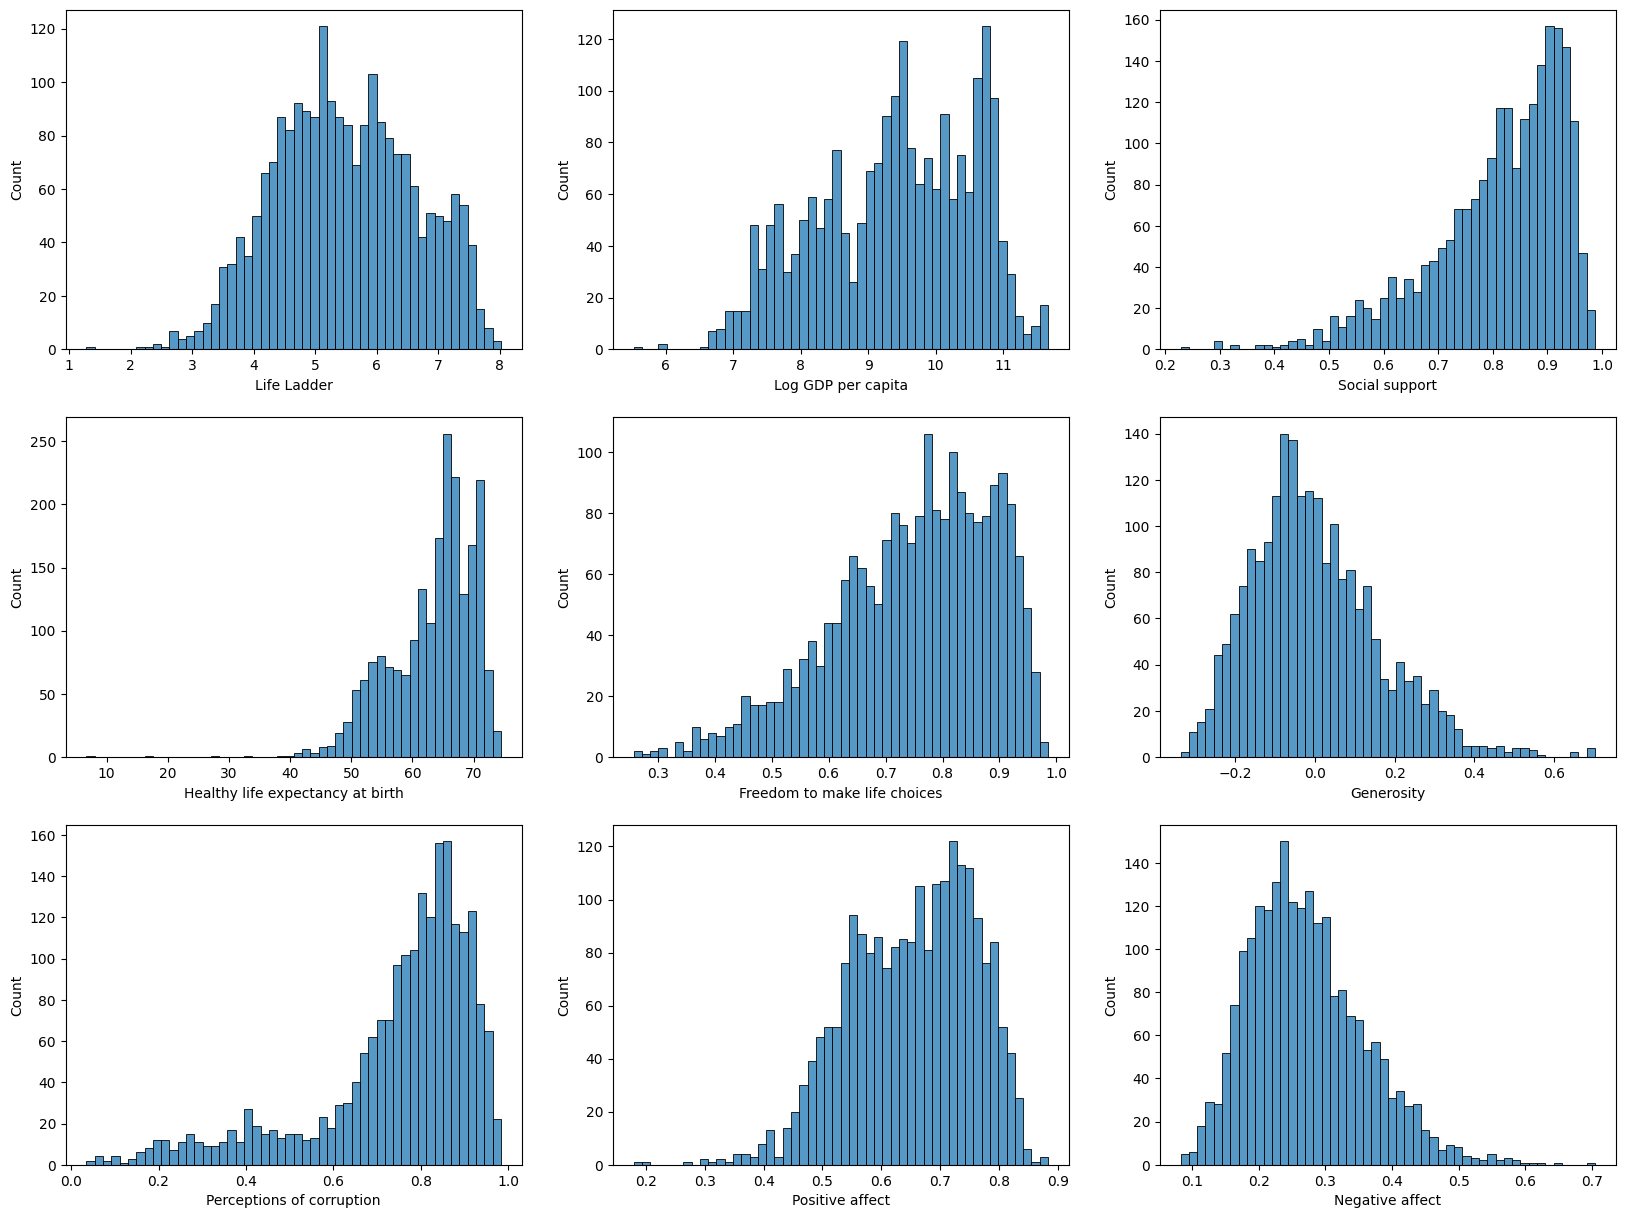

In [371]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

sns.histplot(df['Life Ladder'], bins=50, ax=axs[0, 0])
sns.histplot(df['Log GDP per capita'], bins=50, ax=axs[0, 1])
sns.histplot(df['Social support'], bins=50, ax=axs[0, 2])
sns.histplot(df['Healthy life expectancy at birth'], bins=50, ax=axs[1, 0])
sns.histplot(df['Freedom to make life choices'], bins=50, ax=axs[1, 1])
sns.histplot(df['Generosity'], bins=50, ax=axs[1, 2])
sns.histplot(df['Perceptions of corruption'], bins=50, ax=axs[2, 0])
sns.histplot(df['Positive affect'], bins=50, ax=axs[2, 1])
sns.histplot(df['Negative affect'], bins=50, ax=axs[2, 2])


## 1.Bivariate analysis

<Axes: xlabel='Life Ladder', ylabel='Healthy life expectancy at birth'>

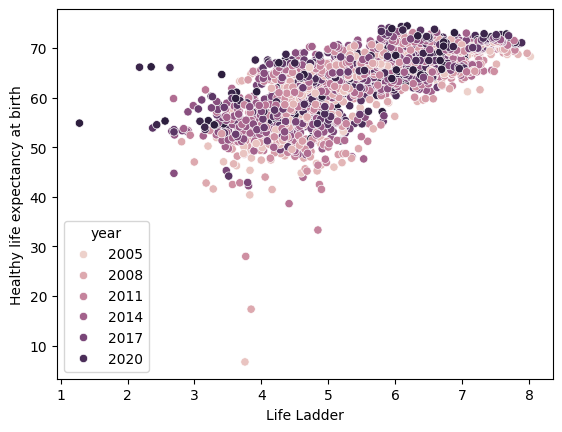

In [372]:
sns.scatterplot(data=df, x='Life Ladder', y='Healthy life expectancy at birth', hue='year')

<Axes: xlabel='Log GDP per capita', ylabel='Social support'>

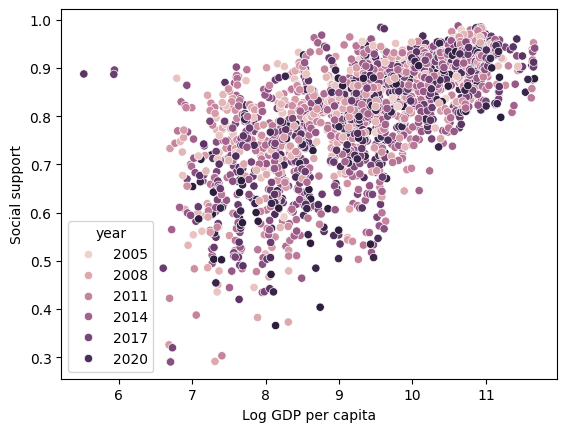

In [373]:
sns.scatterplot(data=df, x='Log GDP per capita', y='Social support', hue='year')

**Are there any interesting correlations in the data?**

**Can you identify any limitations, missing values or distortions of the data?**

**What would you like to see in this dataset?**

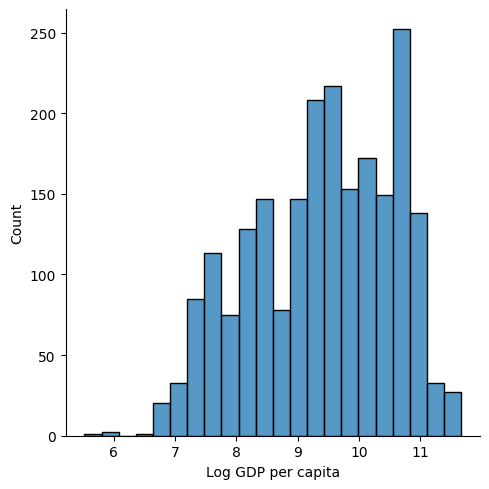

In [374]:
import seaborn as sns

sns.displot(df['Log GDP per capita'])

# Part2:
**What is the happiest country in 2023?  In 2013?**

In [375]:
df_2022 = df_clean[df_clean['year'] == 2022].copy()

# A subjective measure of happiness and let all features ranges from 0 to 1
df_2022['Life Ladder Score'] = df_2022['Life Ladder'] / 10
df_2022['Log GDP per Capita Score'] = (df_2022['Log GDP per capita'] - df_2022['Log GDP per capita'].min()) / (df_2022['Log GDP per capita'].max() - df_2022['Log GDP per capita'].min())
df_2022['Healthy Life Expectancy Score'] = (df_2022['Healthy life expectancy at birth'] - df_2022['Healthy life expectancy at birth'].min()) / (df_2022['Healthy life expectancy at birth'].max() - df_2022['Healthy life expectancy at birth'].min())
df_2022['Generosity Score'] = (df_2022['Generosity'] - df_2022['Generosity'].min()) / (df_2022['Generosity'].max() - df_2022['Generosity'].min())

df_2022['Happiness'] = (df_2022['Life Ladder Score'] + df_2022['Log GDP per Capita Score'] +
                        df_2022['Healthy Life Expectancy Score'] + df_2022['Generosity Score'] + 
                        df_2022['Social support'] + df_2022['Freedom to make life choices'] + 
                        df_2022['Perceptions of corruption'] + df_2022['Positive affect'] - 
                        df_2022['Negative affect'])

happiest_country_2022 = df_2022[df_2022['Happiness'] == df_2022['Happiness'].max()]['Country name'].iloc[0]

happiest_country_2022

'Iceland'

 **In 2013?**

In [376]:
df_2012 = df_clean[df_clean['year'] == 2012].copy()

df_2012['Life Ladder Score'] = df_2012['Life Ladder'] / 10
df_2012['Log GDP per Capita Score'] = (df_2012['Log GDP per capita'] - df_2012['Log GDP per capita'].min()) / (df_2012['Log GDP per capita'].max() - df_2012['Log GDP per capita'].min())
df_2012['Healthy Life Expectancy Score'] = (df_2012['Healthy life expectancy at birth'] - df_2012['Healthy life expectancy at birth'].min()) / (df_2012['Healthy life expectancy at birth'].max() - df_2012['Healthy life expectancy at birth'].min())
df_2012['Generosity Score'] = (df_2012['Generosity'] - df_2012['Generosity'].min()) / (df_2012['Generosity'].max() - df_2012['Generosity'].min())

df_2012['Happiness'] = (df_2012['Life Ladder Score'] + df_2012['Log GDP per Capita Score'] + 
                        df_2012['Healthy Life Expectancy Score'] + df_2012['Generosity Score'] + 
                        df_2012['Social support'] + df_2012['Freedom to make life choices'] + 
                        df_2012['Perceptions of corruption'] + df_2012['Positive affect'] - 
                        df_2012['Negative affect'])

happiest_country_2012 = df_2012[df_2012['Happiness'] == df_2012['Happiness'].max()]['Country name'].iloc[0]

happiest_country_2012


'Iceland'

**Of all time?**

In [377]:
df_clean2 = df_clean.copy()

df_clean2['Life Ladder Score'] = df_clean2['Life Ladder'] / 10
df_clean2['Log GDP per Capita Score'] = (df_clean2['Log GDP per capita'] - df_clean2['Log GDP per capita'].min()) / (df_clean2['Log GDP per capita'].max() - df_clean2['Log GDP per capita'].min())
df_clean2['Healthy Life Expectancy Score'] = (df_clean2['Healthy life expectancy at birth'] - df_clean2['Healthy life expectancy at birth'].min()) / (df_clean2['Healthy life expectancy at birth'].max() - df_clean2['Healthy life expectancy at birth'].min())
df_clean2['Generosity Score'] = (df_clean2['Generosity'] - df_clean2['Generosity'].min()) / (df_clean2['Generosity'].max() - df_clean2['Generosity'].min())

df_clean2['Total Happiness'] = (df_clean2['Life Ladder Score'] + df_clean2['Log GDP per Capita Score'] +
                                df_clean2['Healthy Life Expectancy Score'] + df_clean2['Generosity Score'] +
                                df_clean2['Social support'] + df_clean2['Freedom to make life choices'] +
                                df_clean2['Perceptions of corruption'] + df_clean2['Positive affect'] - 
                                df_clean2['Negative affect'])

total_country_happiness = df_clean2.groupby('Country name')['Total Happiness'].sum().sort_values(ascending=False)

happiest_country_alltime = total_country_happiness.idxmax()

happiest_country_alltime

'Thailand'

**What is the least happy country in 2023, 2013 and of all time?**

In [378]:
least_happy_country_2022 = df_2022[df_2022['Happiness'] == df_2022['Happiness'].min()]['Country name'].iloc[0]
least_happy_country_2022

'Benin'

In [379]:
least_happy_country_2012 = df_2012[df_2012['Happiness'] == df_2012['Happiness'].min()]['Country name'].iloc[0]
least_happy_country_2012

'Rwanda'

In [380]:
least_happy_country_alltime = total_country_happiness.idxmin()
least_happy_country_alltime

'Guyana'

# Part3:
**Of the countries in this dataset, which country had the largest increase in happiness from its start of participation to 2023?**

**Which had the largest decrease in happiness?**